In [90]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig

In [91]:
print("Antwerp scores:")
antwerp = load_all_scores("logs/dataset_train_realworld_Antwerp_HGS_0.1", [1], ["Antwerp1.txt", "Antwerp2.txt"]).applymap(lambda x: min(x))
brussels = load_all_scores("logs/dataset_train_realworld_Brussels_HGS_0.1", [1], ["Brussels1.txt", "Brussels2.txt"]).applymap(lambda x: min(x))
flanders = load_all_scores("logs/dataset_train_realworld_Flanders_HGS_0.1", [1], ["Flanders1.txt", "Flanders2.txt"]).applymap(lambda x: min(x))
ghent = load_all_scores("logs/dataset_train_realworld_Ghent_HGS_0.1", [1], ["Ghent1.txt", "Ghent2.txt"]).applymap(lambda x: min(x))

best_scores = {}
for instance in [antwerp, brussels, flanders, ghent]:
    for key in instance:
        best_scores[key] = instance[key].values[0]
best_scores

Antwerp scores:


{'Antwerp1.txt': 487605.8125,
 'Antwerp2.txt': 298147.90625,
 'Brussels1.txt': 518598.25,
 'Brussels2.txt': 356116.21875,
 'Flanders1.txt': 7488638.5,
 'Flanders2.txt': 4623882.5,
 'Ghent1.txt': 482910.90625,
 'Ghent2.txt': 266485.6875}

In [92]:
antwerp.keys()

Index(['Antwerp1.txt', 'Antwerp2.txt'], dtype='object')

In [93]:
def show_graphs(algo, lamb, best_scores, data_name):
    n = 2
    width = 180*3*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0)
    os.makedirs(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(best_scores.keys()):
        plotly_fig, score = instance_fig(best_scores, key, f"dataset/train/realworld/{data_name}")
        plotly_fig.write_image(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*3, width=width)
    fig.update_traces(line_width=0.5, marker_size=1)
    fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("png")

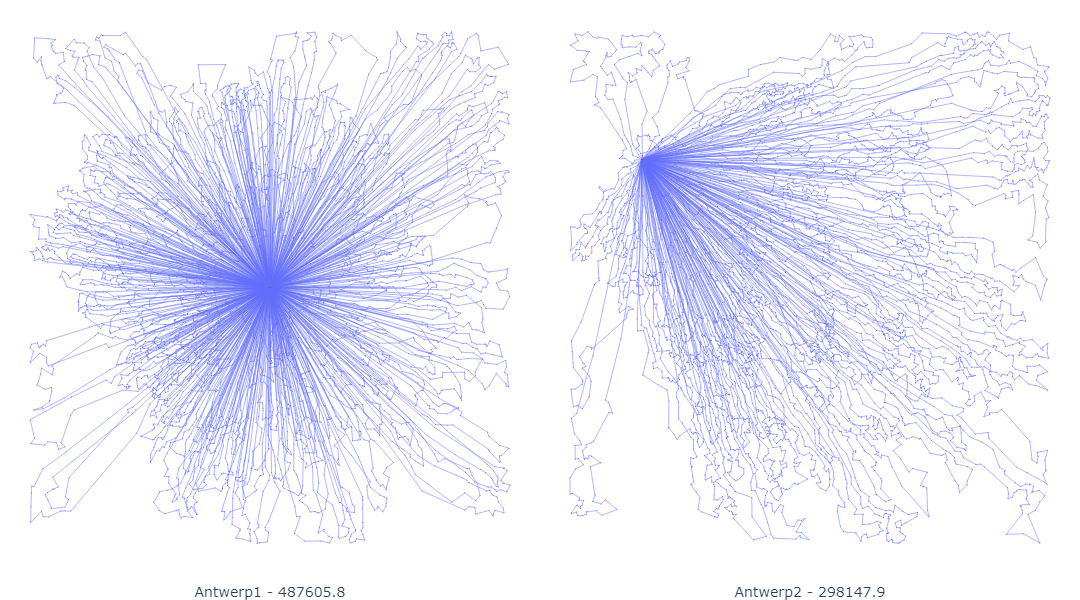

In [94]:
show_graphs("HGS", 0.1, antwerp, "Antwerp")

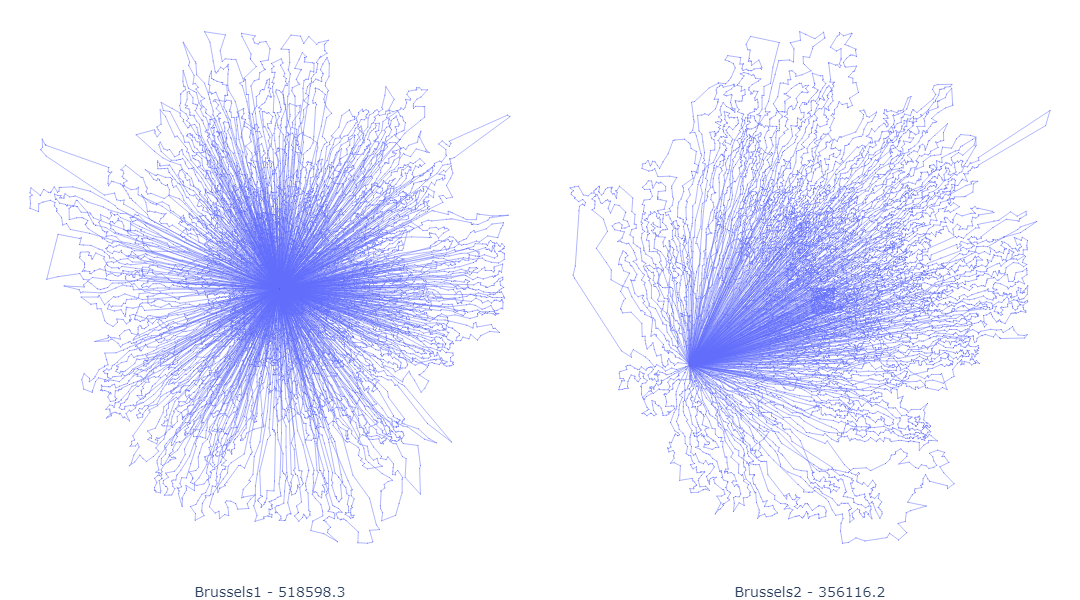

In [95]:
show_graphs("HGS", 0.1, brussels, "Brussels")

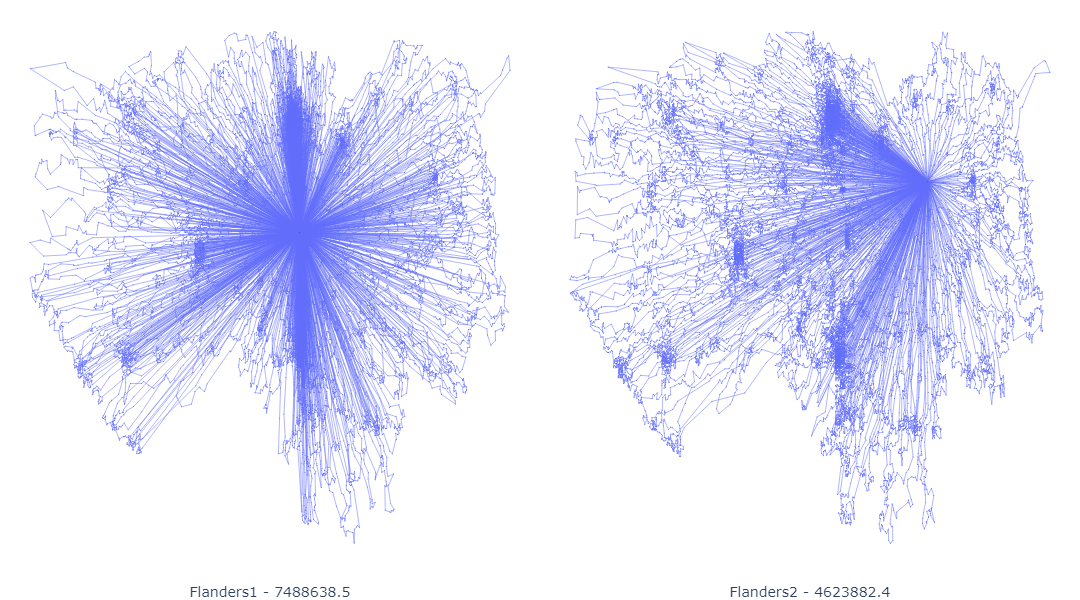

In [96]:
show_graphs("HGS", 0.1, flanders, "Flanders")

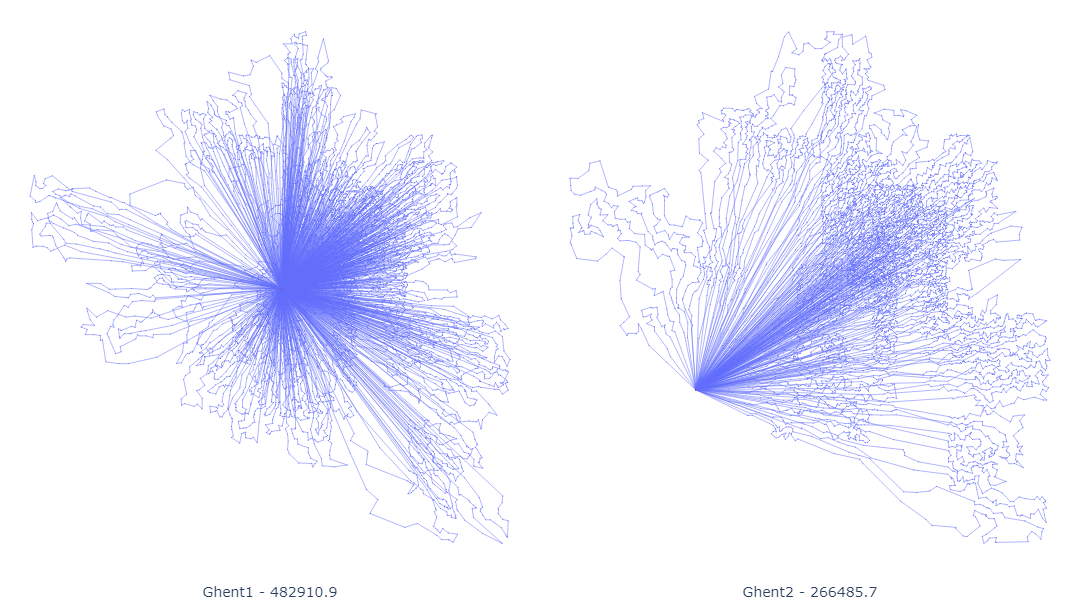

In [97]:
show_graphs("HGS", 0.1, ghent, "Ghent")